# Assignment 5 -- Multi Linear Regression
Problem Statement 2nd
Prepare a prediction model for profit of 50_startups data. Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years Administration -- spend on administration in the past few years Marketing Spend -- spend on Marketing in the past few years State -- states from which data is collected Profit -- profit of each state in the past few years

Dataset--> 50_Startsups.csv

In [1]:
#Importing the Required Labaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings("ignore")  #--to ignore warnings

In [2]:
#Loading The Dataset
Dataset = pd.read_csv("C:/Users/MANISHA//Downloads/50_Startups.csv")
Dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Renaming the column
Because of spaces between the column "R&D Spend" and "Marketing Spend"

In [3]:
#rename the R&D Spend & Marketing Spend column axis=1 perform it based on column 
Dataset = Dataset.rename({'R&D Spend': 'R_D_Spend','Marketing Spend': 'Marketing_Spend'}, axis=1)
Dataset.head()

,R_D_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
#Checking For Dtypes of Column and NA value
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R_D_Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


inference: There are no NA values Present in the Dataset, but Dtype of 'State' is Object, So Dropping State Column


In [5]:
#Droping 'State' Column as it is of object Dtype
Dataset = Dataset.drop(["State"], axis = 1)
Dataset.head()

,R_D_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


# Detecting Collinearity --- Between Columns

Correlation Matrix -- using this method to get a overlook of collinearity present in the dataset

In [6]:
#corr()
Dataset.corr()

,R_D_Spend,Administration,Marketing_Spend,Profit
R_D_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


Scatterplot between variables

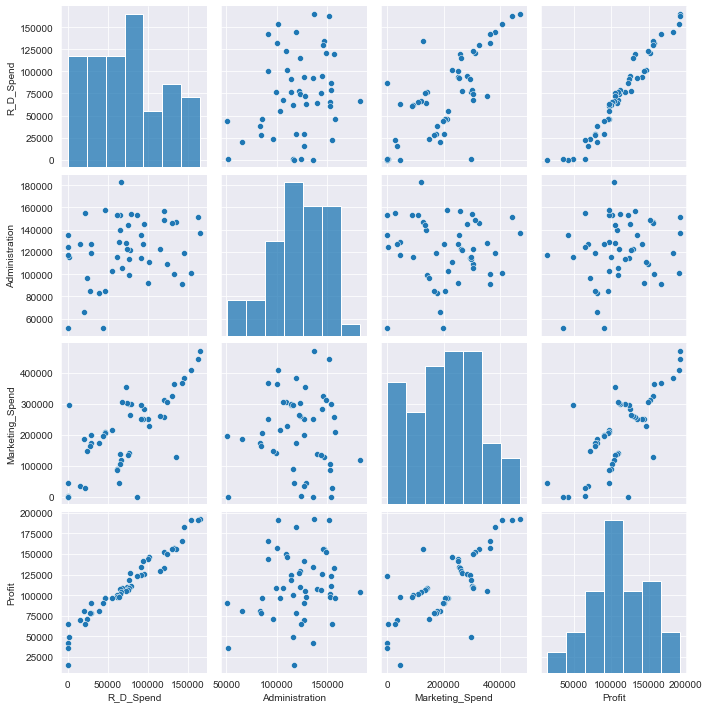

In [7]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(Dataset)

Inference:

Profit & R_D_spend: 0.97 --> Strong Positive Correlation --> Useful For Model Building

Profit & Administration: 0.2 --> Low Positive Correlation --> Useful For Model Building

Profit & Marketing_Spend: 0.74 --> Strong Positive Correlation --> Useful For Model Building

Collinearity Effect Chances R_D_spend & Marketing_Spend: 0.72 --> Strong Positive Correlation --> Can have Collinearity effect

# Preparing a model --Initial Model
1st Model

In [8]:
#Build the model --1st Model
import statsmodels.formula.api as smf 
model = smf.ols('Profit~R_D_Spend + Administration + Marketing_Spend',data=Dataset).fit()

In [9]:
#t and p-Values
print("T_values is: ","\n",model.tvalues,"\n","P_values is: ",'\n', model.pvalues)

T_values is:  
 Intercept           7.626218
R_D_Spend          17.846374
Administration     -0.525507
Marketing_Spend     1.655077
dtype: float64 
 P_values is:  
 Intercept          1.057379e-09
R_D_Spend          2.634968e-22
Administration     6.017551e-01
Marketing_Spend    1.047168e-01
dtype: float64


In [10]:
#1st Model R_square.
First_model_R2 = (model.rsquared,model.rsquared_adj)
First_model_R2

(0.9507459940683246, 0.9475337762901719)

# Hypothesis in MLR
B0 = Beta0 , B1 = Beta1.....B8 = Beta8

H0: B1 = 0, B1--> Slope is Zero Then B1 Variable is not Useful in Predicting

H1: B1 ≠ 0, B1--> Slope is not Zero B1 Variable is Useful in Predicting

(Like This for All Four Betas)

In [11]:
#Hypothesis Test of MLR model
α = 0.05  # Standard

if model.pvalues[1] < α:
    print("p_value is:",model.pvalues[1],", Reject H0,Slope is not Zero and B1(R_D_Spend) is Significant in Predicting")
else:
    print("p_value is:",model.pvalues[1],", Fail to Reject H0,Slope is Zero and B1(R_D_Spend) is Insignificant in Predicting")

if model.pvalues[2] < α:
    print("p_value is:",model.pvalues[2],", Reject H0,Slope is not Zero and B2(Administration) is Significant in Predicting")
else:
    print("p_value is:",model.pvalues[2],", Fail to Reject H0,Slope is Zero and B2(Administration) is Insignificant in Predicting")

if model.pvalues[3] < α:
    print("p_value is:",model.pvalues[3],", Reject H0,Slope is not Zero and B3(Marketing_Spend) is Significant in Predicting")
else:
    print("p_value is:",model.pvalues[3],", Fail to Reject H0,Slope is Zero and B3(Marketing_Spend) is Insignificant in Predicting")

p_value is: 2.6349677214704837e-22 , Reject H0,Slope is not Zero and B1(R_D_Spend) is Significant in Predicting
p_value is: 0.6017551078497484 , Fail to Reject H0,Slope is Zero and B2(Administration) is Insignificant in Predicting
p_value is: 0.10471681926658585 , Fail to Reject H0,Slope is Zero and B3(Marketing_Spend) is Insignificant in Predicting


Inference: Through hypothesis Administration & Marketing_Spend Column is giving insignificant,But First let confirm Using VIF 

# VIF(Variable inflation Factor) -- Using this method to confirm Collinearity if it is still there or not.

Checking all Y(input) Variable one by one regressing them with Eachother

Industry Standard ≤ 20 for VIF Value

In [12]:
rsq_RD = smf.ols('R_D_Spend~Administration+Marketing_Spend',data=Dataset).fit().rsquared  
vif_RD = 1/(1-rsq_RD) # 16.33

rsq_Adm = smf.ols('Administration~R_D_Spend+Marketing_Spend',data=Dataset).fit().rsquared  
vif_Adm = 1/(1-rsq_Adm) # 564.98

rsq_Mar = smf.ols('Marketing_Spend~R_D_Spend+Administration',data=Dataset).fit().rsquared  
vif_Mar = 1/(1-rsq_Mar) #  564.84

# Storing vif values in a data frame
d1 = {'Variables':['R_D_Spend','Administration','Marketing_Spend'],'VIF':[vif_RD,vif_Adm,vif_Mar,]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,R_D_Spend,2.468903
1,Administration,1.175091
2,Marketing_Spend,2.326773


inference: There are no collinearity between variables Since All columns VIF is Greater then 20.

# Model Validation Techniques -- 3 Technique

Test for Normality of Residuals (Q-Q Plot) -- 1st Technique

Datapoints must be inside Solid red Line or inside the 95% CI

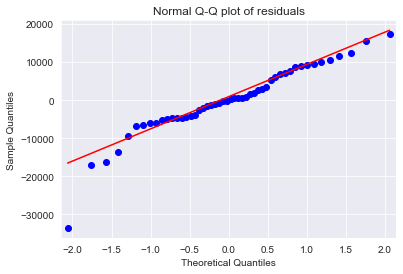

In [13]:
#Building the QQ Plot
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [14]:
#Getting a List of Outliers
list(np.where(model.resid>10000))

[array([10, 12, 16, 36, 38, 45], dtype=int64)]

Inference: The Given Array is the Outlier if Residual >3000

# Residual Plot for Homoscedasticity (Fitted VS Residuals, (Ei vsY^) ) --2nd Technique

In [15]:
#Defining a Function For Standardization Value.
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

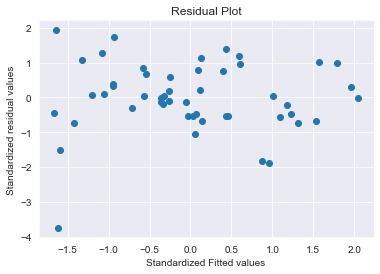

In [16]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

Inference: No Clear Pattern

# Residual Vs Regressors -- 3rd Technique (Ei vs Xi

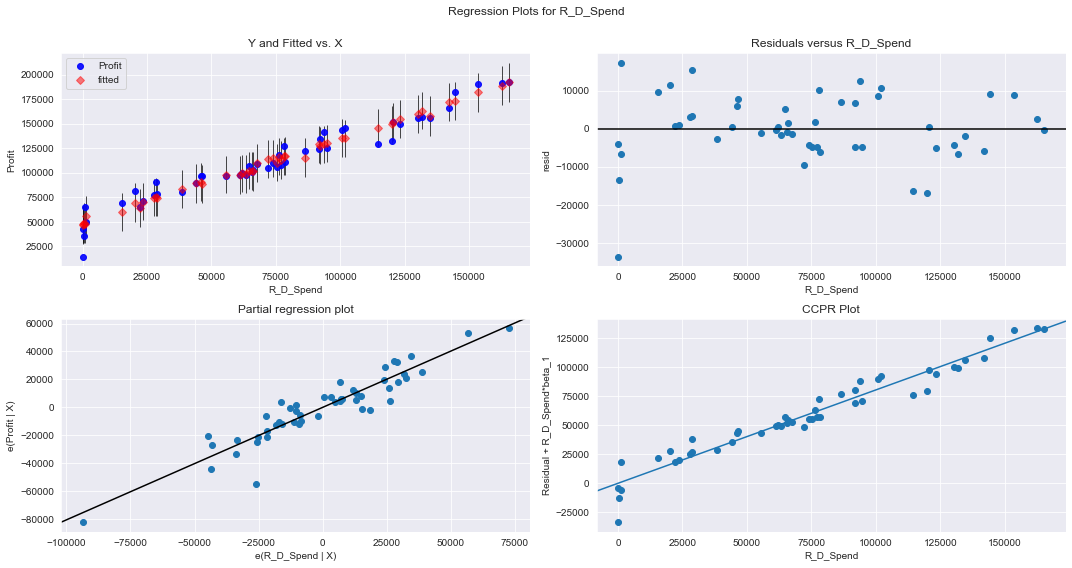

In [17]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "R_D_Spend", fig=fig)
plt.show()

Inference: CCPR Plot has Scope Which means R_D_Spend is Significant

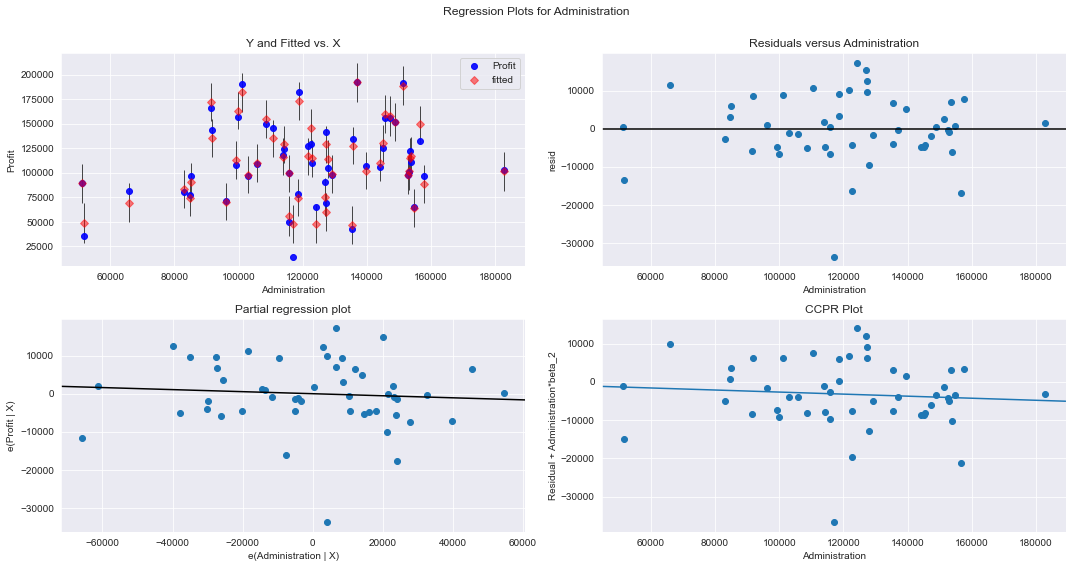

In [18]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

Inference: CCPR Plot has Scope Which means Administration is Significant 

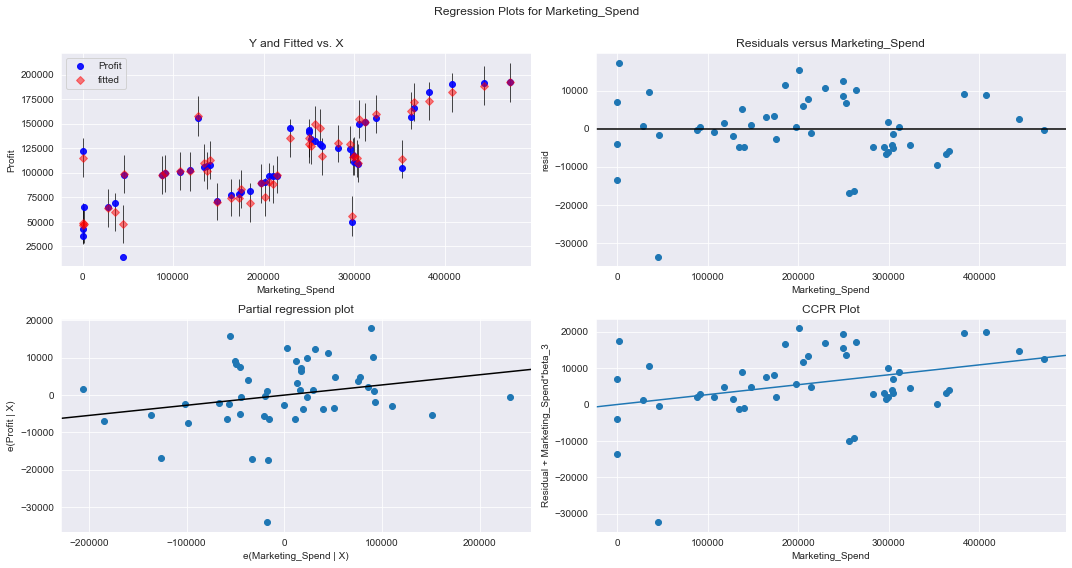

In [19]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Marketing_Spend", fig=fig)
plt.show()

Inference: CCPR Plot has Scope Which means Marketing Spend is Significant

Model Deletion Diagnostics-- (Detecting Influencers/Outliers) -- Two methods

Cook’s Distance -- 1st Method (First Implementation)

In [20]:
model_influence = model.get_influence()   # Gives Two Value, 1st is Cook distance And 2nd is its p_values 
t = model_influence.cooks_distance[0]  

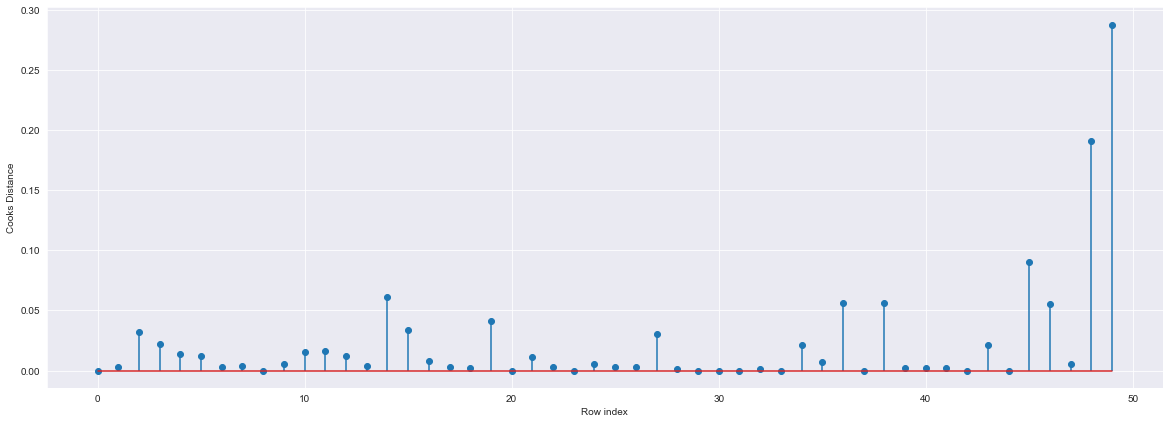

In [21]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(Dataset)), np.round(t, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [22]:
#index and value of influencer where c is more than .5
(np.argmax(t),np.max(t))

(49, 0.2880822927543264)

inference: cook distance gives 49 index datapoint as the potential outliers but, let get some more no of outliers using Leverage method.

# High Influence points-- 2nd Method (1st implementation)

After the influence Points is the outlier

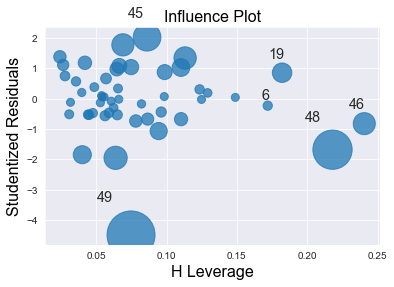

In [23]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [24]:
# 3*((k + 1)/n) -- Formula to determine Influnce / Leverage point
k = Dataset.shape[1]   # K = no of rows
n = Dataset.shape[0]   # n = no of columns
leverage = 3*((k + 1)/n)

leverage 

0.30000000000000004

Inference: After 0.30 any Datapoint is a outlier, so datapoint with index 19,46,47,48,49 are potential outliers

# Comparing the Extreme Observations (Outlier) with Other records in the dataset

In [25]:
# Getting the Values of observation From Cook Method
Dataset[Dataset.index.isin([19,46,47,48,49])]

,R_D_Spend,Administration,Marketing_Spend,Profit
19,86419.70,153514.11,0.00,122776.86
46,1315.46,115816.21,297114.46,49490.75
47,0.00,135426.92,0.00,42559.73
48,542.05,51743.15,0.00,35673.41
49,0.00,116983.80,45173.06,14681.40


In [26]:
#See the differences in R_D_Spend and other variable values
Dataset.head()

,R_D_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


Inference: As We can see observation are Extreme, as compared to other record in the Dataset.

# Improving the model --Deleting the outlier point

In [27]:
#Discard the data points which are influencers and reasign the row number (reset_index())
Dataset1=Dataset.drop(Dataset.index[[19,46,47,48,49]],axis=0).reset_index()

In [28]:
#Drop the original index
Dataset1=Dataset1.drop(['index'],axis=1)
Dataset1.head()

,R_D_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


Build New Model after 1st Implementation of Cooks Distance And Leverage

# 2nd Model

In [29]:
#Build the model --2nd Model
import statsmodels.formula.api as smf 
model = smf.ols('Profit~R_D_Spend+Administration+Marketing_Spend',data=Dataset1).fit()

In [30]:
#2nd Model R_square.
Second_model_R2 = (model.rsquared,model.rsquared_adj)
Second_model_R2

(0.9597068086420004, 0.9567585263475127)

In [32]:
#Checking Adj_R2 After Dropping Doors & cc columns
if First_model_R2[0]<Second_model_R2[0]:
    print("2nd Model is Better as its R2",Second_model_R2[0],"is more then 1st Model R2",First_model_R2[0])
else:
    print("1st Model is Better as its R2",First_model_R2[0],"is more then 2nd Model R2",Second_model_R2[0])

2nd Model is Better as its R2 0.9597068086420004 is more then 1st Model R2 0.9507459940683246


inference: R_squared of 2nd model is more than R_squared of 1st model, so 2nd model is better then 1st model

# 2nd Implementation of Cook Distance

In [33]:
model_influence = model.get_influence()   # Gives Two Value, 1st is Cook distance And 2nd is its p_values 
t = model_influence.cooks_distance[0] 

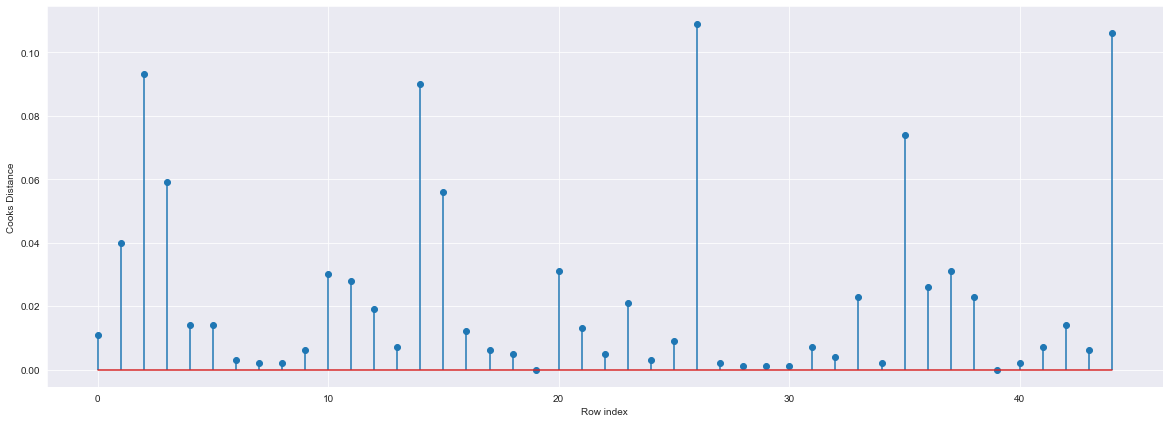

In [34]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(Dataset1)), np.round(t, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [35]:
#index and value of influencer where c is more than .5
(np.argmax(t),np.max(t))

(26, 0.10893054377443558)

Inference: 26 index is the outlier.

# Improving the model --Deleting the outlier point


In [37]:
#Discard the data points which are influencers and reasign the row number (reset_index())
Dataset2=Dataset1.drop(Dataset1.index[[26]],axis=0).reset_index()

In [38]:
#Drop the original index
Dataset2=Dataset2.drop(['index'],axis=1)
Dataset2.head()

,R_D_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


Build New Model after 2nd Implementation of Cooks Distance

In [39]:
#Build the model --3rd Model
import statsmodels.formula.api as smf 
model = smf.ols('Profit~R_D_Spend+Administration+Marketing_Spend',data=Dataset2).fit()

In [40]:
#3rd Model R_square.
Third_model_R2 = (model.rsquared,model.rsquared_adj)
Third_model_R2

(0.9623141127412619, 0.9594876711968565)

In [41]:
#Checking R2 of 2nd and 3rd Model to find out which model is better
if Second_model_R2[0]<Third_model_R2[0]:
    print("3rd Model is Better as its R2",Third_model_R2[0],"is more then 2nd Model R2",Second_model_R2[0])
else:
    print("2nd Model is Better as its R2",Second_model_R2[0],"is more then 3rd Model R2",Third_model_R2[0])

3rd Model is Better as its R2 0.9623141127412619 is more then 2nd Model R2 0.9597068086420004


inference: R_squared of 3rd model is more than R_squared of 2nd model, so 3rd is better then 2nd model

# 3rd Implementation of Cook Distance

In [42]:
model_influence = model.get_influence()   # Gives Two Value, 1st is Cook distance And 2nd is its p_values 
t = model_influence.cooks_distance[0]

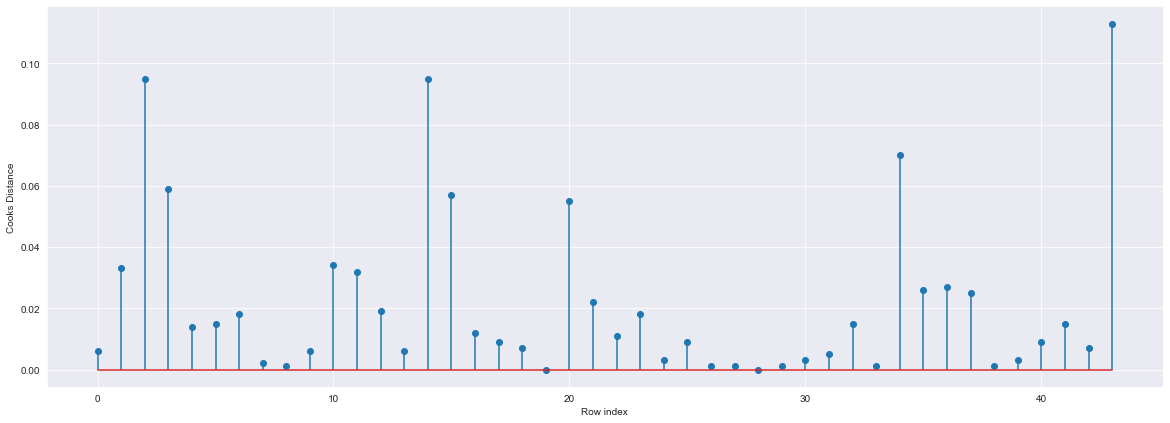

In [43]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(Dataset2)), np.round(t, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [44]:
#index and value of influencer where t is more than .5
(np.argmax(t),np.max(t))

(43, 0.11309431529560295)

Inference: 43 index is the outlier.

# Improving the model --Deleting the outlier point

In [45]:
#Discard the data points which are influencers and reasign the row number (reset_index())
Dataset3=Dataset2.drop(Dataset2.index[[43]],axis=0).reset_index()

In [46]:
#Drop the original index
Dataset3=Dataset3.drop(['index'],axis=1)
Dataset3.head()

,R_D_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


Build New Model after 3rd Implementation of Cooks Distance

In [47]:
#Build the model --4th Model
import statsmodels.formula.api as smf 
model = smf.ols('Profit~R_D_Spend+Administration+Marketing_Spend',data=Dataset3).fit()

In [48]:
#4th Model R_square.
Fourth_model_R2 = (model.rsquared,model.rsquared_adj)
Fourth_model_R2

(0.9634037233282845, 0.9605886251227679)

In [49]:
#Checking R2 of 3rd and 4th Model to find out which model is better, or R2 is same
if Third_model_R2[0]<Fourth_model_R2[0]:
    print("4th Model is Better as its R2",Fourth_model_R2[0],"is more then 3rd Model R2",Third_model_R2[0])
else:
    print("3rd Model is Better as its R2",Third_model_R2[0],"is more then 4th Model R2",Fourth_model_R2[0])

4th Model is Better as its R2 0.9634037233282845 is more then 3rd Model R2 0.9623141127412619


Inference : R_squared of 4th model is more than R_squared of 3rd model

# 4th Implementation of Cook Distance

In [50]:
model_influence = model.get_influence()   # Gives Two Value, 1st is Cook distance And 2nd is its p_values 
t = model_influence.cooks_distance[0]

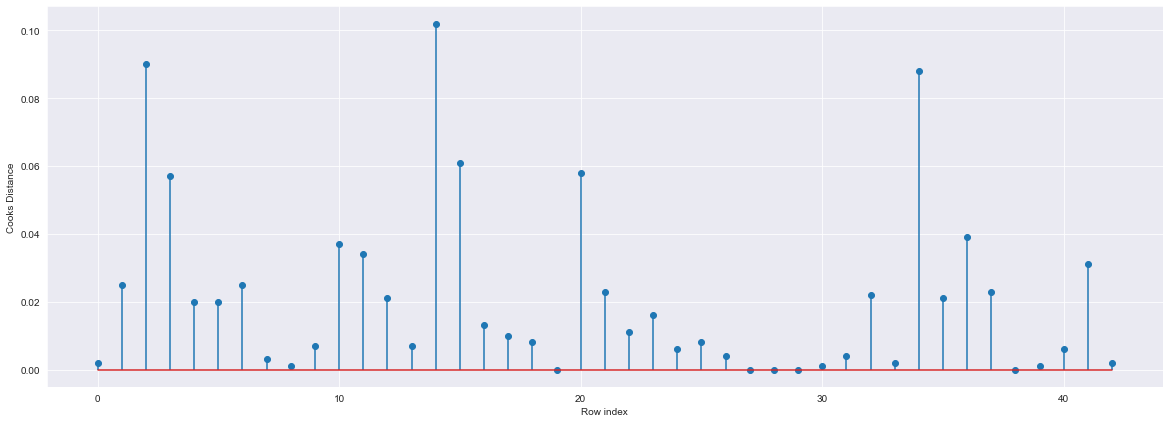

In [51]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(Dataset3)), np.round(t, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [52]:
#index and value of influencer where t is more than .5
(np.argmax(t),np.max(t))

(14, 0.10161389336790616)

Inference: 14 index is the outlier.

# Improving the model --Deleting the outlier point

In [53]:
#Discard the data points which are influencers and reasign the row number (reset_index())
Dataset4=Dataset3.drop(Dataset3.index[[14]],axis=0).reset_index()

In [54]:
#Drop the original index
Dataset4=Dataset4.drop(['index'],axis=1)
Dataset4.head()

,R_D_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


# Build New Model after 4th Implementation of Cooks Distance

In [55]:
#Build the model --5th Model
import statsmodels.formula.api as smf 
model = smf.ols('Profit~R_D_Spend+Administration+Marketing_Spend',data=Dataset4).fit()

In [56]:
#5th Model R_square.
Fifth_model_R2 = (model.rsquared,model.rsquared_adj)
Fifth_model_R2

(0.9681708434443131, 0.9656580152951799)

Inference : R_squared of 5th model is more than R_squared of 4th model

# 5th Implementation of Cook Distance

In [58]:
model_influence = model.get_influence()   # Gives Two Value, 1st is Cook distance And 2nd is its p_values 
t = model_influence.cooks_distance[0]

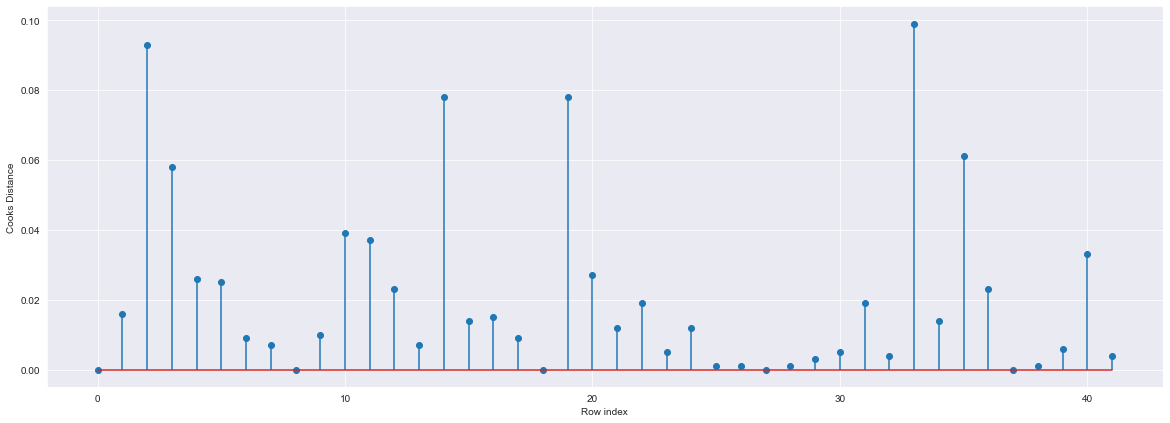

In [59]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(Dataset4)), np.round(t, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [60]:
#index and value of influencer where t is more than .5
(np.argmax(t),np.max(t))

(33, 0.09908250691301575)

inference: cook distance gives 33 index datapoint as the potential outliers but, let get some more no of outliers using Leverage method.

# High Influence points-- 2nd Method (2nd implementation

After the influence Points is the outlier

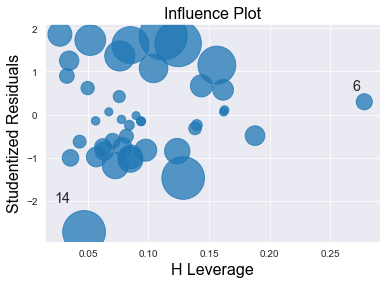

In [61]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [62]:
# 3*((k + 1)/n) -- Formula to determine Influnce / Leverage point
k = Dataset4.shape[1]   # K = no of rows
n = Dataset4.shape[0]   # n = no of columns
leverage = 3*((k + 1)/n)

leverage 

0.3571428571428571

Inference: After 0.35 any Datapoint is a outlier, so datapoint with index 6,14,33 are potential outliers

# Improving the model --Deleting the outlier point

In [63]:
#Discard the data points which are influencers and reasign the row number (reset_index())
Dataset5=Dataset4.drop(Dataset4.index[[6,14,33]],axis=0).reset_index()

In [64]:
#Drop the original index
Dataset5=Dataset5.drop(['index'],axis=1)
Dataset5.head()

,R_D_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


# Build New Model after 5th Implementation of Cooks Distance & 2nd implementation of Leverage


In [65]:
#Build the model --6th Model
import statsmodels.formula.api as smf 
model = smf.ols('Profit~R_D_Spend+Administration+Marketing_Spend',data=Dataset5).fit()#Checking R2 of 5th and 6th Model to find out which model is better, or R2 is same
if Fifth_model_R2[0]<Sixth_model_R2[0]:
    print("6th Model is Better as its R2",Sixth_model_R2[0],"is more then 5th Model R2",Fifth_model_R2[0])
else:
    print("5th Model is Better as its R2",Fifth_model_R2[0],"is more then 6th Model R2",Sixth_model_R2[0])

In [66]:
#6th Model R_square.
Sixth_model_R2 = (model.rsquared,model.rsquared_adj)
Sixth_model_R2

(0.9751971965604449, 0.9730712419799116)

In [67]:
#Checking R2 of 5th and 6th Model to find out which model is better, or R2 is same
if Fifth_model_R2[0]<Sixth_model_R2[0]:
    print("6th Model is Better as its R2",Sixth_model_R2[0],"is more then 5th Model R2",Fifth_model_R2[0])
else:
    print("5th Model is Better as its R2",Fifth_model_R2[0],"is more then 6th Model R2",Sixth_model_R2[0])

6th Model is Better as its R2 0.9751971965604449 is more then 5th Model R2 0.9681708434443131


Inference : R_squared of 6th model is more than R_squared of 5th model

# 6th Implementation of Cook Distance

In [68]:
model_influence = model.get_influence()   # Gives Two Value, 1st is Cook distance And 2nd is its p_values 
t = model_influence.cooks_distance[0]

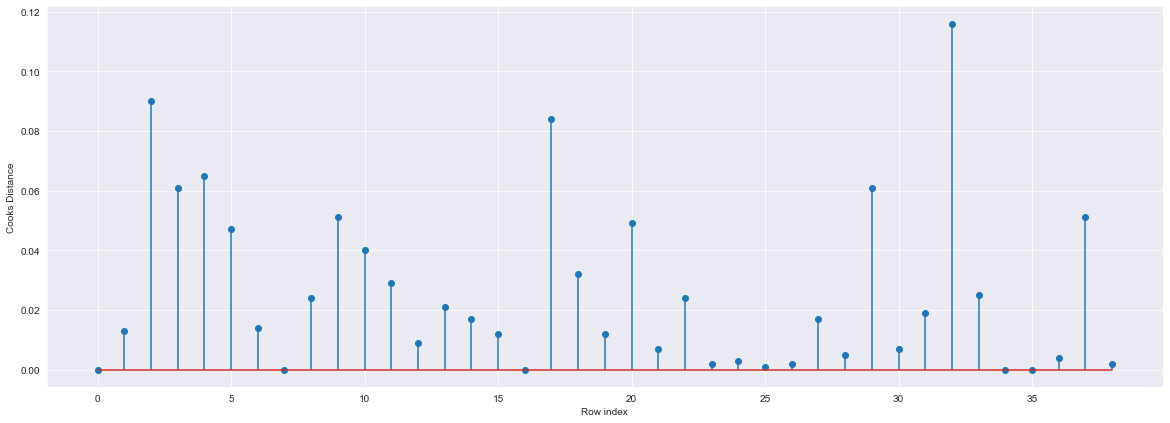

In [69]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(Dataset5)), np.round(t, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [70]:
#index and value of influencer where t is more than .5
(np.argmax(t),np.max(t))

(32, 0.11568807666160508)

inference: cook distance gives 32 index datapoint as the potential outliers but, let get some more no of outliers using Leverage method.

# High Influence points-- 2nd Method (3rd implementation)

After the influence Points is the outlier

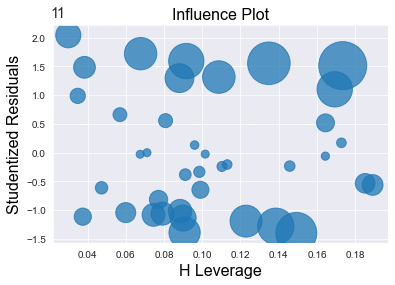

In [71]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [72]:
# 3*((k + 1)/n) -- Formula to determine Influnce / Leverage point
k = Dataset5.shape[1]   # K = no of rows
n = Dataset5.shape[0]   # n = no of columns
leverage = 3*((k + 1)/n)

leverage 

0.3846153846153846

Inference: After 0.384 any Datapoint is a outlier, so datapoint with index 11,32 are potential outliers

# Improving the model --Deleting the outlier point

In [73]:
#Discard the data points which are influencers and reasign the row number (reset_index())
Dataset6=Dataset5.drop(Dataset5.index[[11,32]],axis=0).reset_index()

In [74]:
#Drop the original index
Dataset6=Dataset6.drop(['index'],axis=1)
Dataset6.head()

,R_D_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


# Build New Model after 6th Implementation of Cooks Distance & 3rd implementation of Leverage

In [75]:
#Build the model --7th Model
import statsmodels.formula.api as smf 
model = smf.ols('Profit~R_D_Spend+Administration+Marketing_Spend',data=Dataset6).fit()

In [76]:
#7th Model R_square.
Seventh_model_R2 = (model.rsquared,model.rsquared_adj)
Seventh_model_R2

(0.9786003135499775, 0.9766548875090663)

In [77]:
#Checking R2 of 6th and 7th Model to find out which model is better, or R2 is same
if Sixth_model_R2[0]<Seventh_model_R2[0]:
    print("7th Model is Better as its R2",Seventh_model_R2[0],"is more then 6th Model R2",Sixth_model_R2[0])
else:
    print("6th Model is Better as its R2",Sixth_model_R2[0],"is more then 7th Model R2",Seventh_model_R2[0])

7th Model is Better as its R2 0.9786003135499775 is more then 6th Model R2 0.9751971965604449


Inference : R_squared of 7th model is more than R_squared of 6th model

# 7th Implementation of Cook Distance

In [78]:
model_influence = model.get_influence()   # Gives Two Value, 1st is Cook distance And 2nd is its p_values 
t = model_influence.cooks_distance[0]

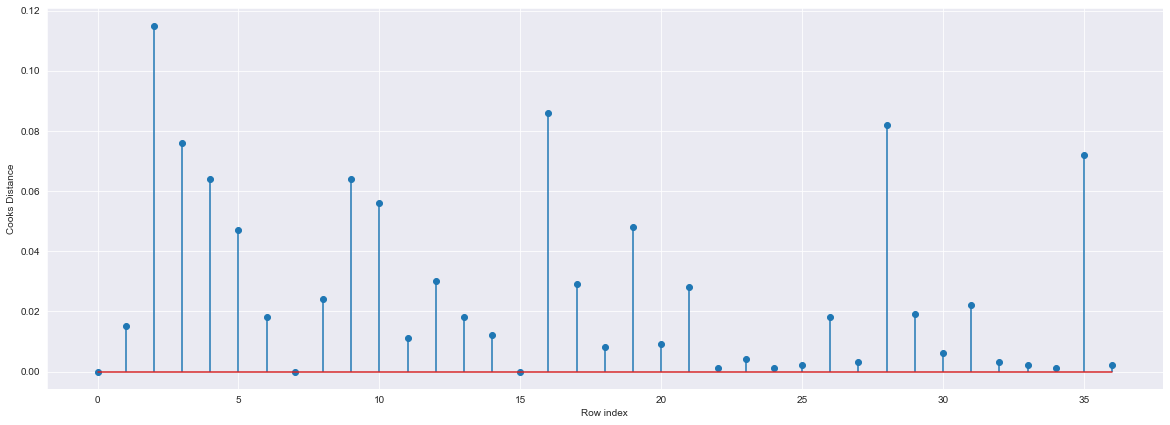

In [79]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(Dataset6)), np.round(t, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [80]:
#index and value of influencer where t is more than .5
(np.argmax(t),np.max(t))

(2, 0.11481081135341266)

Inference: Now outlier is 2 index, but Since the value is <1 , we can stop the diagnostic process and finalize the model, but Just to Confirm We will Create another model and Check R_Squared

# Improving the model --Deleting the outlier point

In [81]:
#Discard the data points which are influencers and reasign the row number (reset_index())
Dataset7=Dataset6.drop(Dataset6.index[[2]],axis=0).reset_index()

In [82]:
#Drop the original index
Dataset7=Dataset7.drop(['index'],axis=1)
Dataset7.head()

,R_D_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,144372.41,118671.85,383199.62,182901.99
3,142107.34,91391.77,366168.42,166187.94
4,131876.90,99814.71,362861.36,156991.12


Build New Model after 7th Implementation of Cooks Distance

In [83]:
#Build the model --8th Model --check model
import statsmodels.formula.api as smf 
check_model = smf.ols('Profit~R_D_Spend+Administration+Marketing_Spend',data=Dataset7).fit()

In [84]:
#8th Model R_square.
Eigth_model_R2 = (check_model.rsquared,check_model.rsquared_adj)
Eigth_model_R2

(0.9779919091714279, 0.9759286506562492)

In [85]:
#Checking R2 of 7th and 8th Model to find out which model is better, or R2 is same
if Seventh_model_R2[0]<Eigth_model_R2[0]:
    print("8th Model is Better as its R2",Eigth_model_R2[0],"is more then 7th Model R2",Seventh_model_R2[0])
else:
    print("7th Model is Better as its R2",Seventh_model_R2[0],"is more then 8th model R2",Eigth_model_R2[0])

7th Model is Better as its R2 0.9786003135499775 is more then 8th model R2 0.9779919091714279


Inference : R_squared of 7th model is more than R_squared of 8th model, So Our final model is 7th model

# Creating a DataFrame / Table of R_Squared

In [86]:
R2 = {'Model':['First_Model','Second_Model','Third_Model','Forth_Model','Fifth_Model','Sixth_Model','FINAL_Seventh_Model','CHECK_Eigth_Model'],
             'R_Square':[First_model_R2[0],Second_model_R2[0],Third_model_R2[0],Fourth_model_R2[0],Fifth_model_R2[0],Sixth_model_R2[0],Seventh_model_R2[0],Eigth_model_R2[0]]}
R_Squared = pd.DataFrame(R2)
R_Squared

,Model,R_Square
0,First_Model,0.950746
1,Second_Model,0.959707
2,Third_Model,0.962314
3,Forth_Model,0.963404
4,Fifth_Model,0.968171
5,Sixth_Model,0.975197
6,FINAL_Seventh_Model,0.978600
7,CHECK_Eigth_Model,0.977992


predicting for new data

In [87]:
#New data for prediction
new_data=pd.DataFrame({'R_D_Spend':154000.50,"Administration":150340.55,"Marketing_Spend":383600.78},index=[1])
new_data

,R_D_Spend,Administration,Marketing_Spend
1,154000.5,150340.55,383600.78


In [88]:
#Predicting For New Data/Record
model.predict(new_data)

1    180688.684316
dtype: float64

Inference: Price Will be 180.688.68 for the given new record/Datapoint

In [89]:
#Coefficients
model.params

Intercept          52496.454766
R_D_Spend              0.792666
Administration        -0.029929
Marketing_Spend        0.027687
dtype: float64

Inference: Intercept is B0 = 52496.45, R_D_Spend is B1 = 0.792, Administration is B2 = -0.02, Marketing_Spend is B3 = 0.02.

In [90]:
#### Manually  Calculating and Checking the regression equation of the  Final model

# Y = B0 + B1X1 + B2X2 + B3X3

#From Model
# B0 = 52496.45
# B1 = 0.792 
# B2 = -0.02 
# B3 = 0.02

In [91]:
#Calculating the New_data Values Manually

Y = (52496.4547) + (0.79266*154000.5) + (-0.029*150340.55) + (0.0276*383600.78)

Y

180793.99660800002

Inference: Manually Also Its gives the approx the Same results as the Regression equation built by the Model 